In [79]:
import numpy as np
import pandas as pd

import seaborn as sns

from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

X, y = load_iris(return_X_y = True, as_frame = True)

X = np.array(X)

sc = StandardScaler()
X = sc.fit_transform(X)

y = np.array(y).reshape(-1, 1)
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [69]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))
 
def sigmoid_derivada(x):
    return sigmoid(x)*(1.0-sigmoid(x))
 

class NeuralNetwork:
 
    def __init__(self, layers):
        self.activation = sigmoid
        self.activation_prime = sigmoid_derivada
 
        self.weights = []
        self.deltas = []

        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) - 1
            self.weights.append(r)
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        self.weights.append(r)
 
    def fit(self, X, y, learning_rate=0.2, epochs=100000):
        
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
        
        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]
 
            for l in range(len(self.weights)):
                dot_value = np.dot(a[l], self.weights[l])
                activation = self.activation(dot_value)
                a.append(activation)
        
            error = y[i] - a[-1]
            deltas = [error * self.activation_prime(a[-1])]
            
            for l in range(len(a) - 2, 0, -1): 
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))
            self.deltas.append(deltas)
 
            deltas.reverse()

            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)
 
            if k % 10000 == 0: print('epochs:', k)
 
    def predict(self, x): 
        ones = np.atleast_2d(np.ones(x.shape[0]))
        a = np.concatenate((np.ones(1).T, np.array(x)), axis=0)
        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        a = list(a).index(max(a)) + 1
        return a
    
    def acc(self, y, y_pred): 
        acum = 0
        for i in range(len(y)):
            if y[i] == y_pred[i]:
                acum += 1
        return acum/len(y)


In [72]:
nn = NeuralNetwork([4,40,3])

nn.fit(X_train, y_train, learning_rate=0.05,epochs=15001)
 
index=0
y_pred = []
for e in X_test:
    y_pred.append(nn.predict(e))
    index=index+1

y_test_normal = []
for e in y_test:
    y_test_normal.append(list(e).index(max(e)) + 1) 

print("ACC: ", nn.acc(y_test_normal, y_pred))

epochs: 0
epochs: 10000
ACC:  0.9666666666666667


<AxesSubplot:>

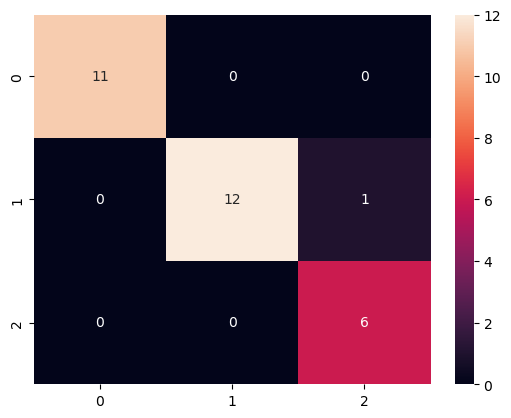

In [78]:
cm = confusion_matrix(y_test_normal, y_pred)

sns.heatmap(confusion_matrix(y_test_normal, y_pred),     
    annot=True)